<a href="https://colab.research.google.com/github/fereol023/My-ML-Courses-/blob/main/TD5_ML_R%C3%A9gression_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 1: Regression linéaire avec Scikit-learn


### I- Importer les données "California_housing"
Dans cet exercice, on utilise un ensemble de données concernant les prix de l’immobilier en Californie ("California_housing"). Dans cet ensemble de données, nous avons des informations concernant la démographie (revenu, population, occupation de la maison) dans les districts, l’emplacement des districts (latitude, longitude) et des informations générales concernant la maison dans les districts (nombre de pièces, nombre de chambres, âge de la maison).

Tout d’abord, on importe les packages pandas et datasets (qui contient des jeus de données pour application). Afficher ensuite la description des des données (bien lire la description) et les 10 premières lignes des données input (data) et output (target).



In [1]:
#importer  la librairie Pandas
import pandas as pd
#importer le jeu de données  california_housing
from sklearn.datasets import fetch_california_housing
données = fetch_california_housing()
#imprimer la description des données
print(données.DESCR)
#récupérer les données dans un frame pandas
X= pd.DataFrame(données.data, columns = données.feature_names)
#afficher les 10 premières ligne des données d'apprentissage
X.head(10)
# données cible dans un nouveau dataframe
Y = pd.DataFrame(données.target)
#afficher les 10 premières ligne des données cible 
Y.head(10)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
5,2.697
6,2.992
7,2.414
8,2.267
9,2.611


## II- Afficher les caractéristiques du DataFrame
Avant de commencer à travailler avec les données importées, il est important de comprendre leurs natures et caractéristiques. 

*   Uilisez les propriétés `shape`et `dtypes` pour afficher les dimensions et le type de chaque colonne dans la table DataFrame  X.

*   Uilisez la fonction `describe` pour afficher une anlyse statistique de chaque colonne dans le DataFrame Y.


In [5]:
# shape of california_housing_dataframe
print(X.shape)
#print the types of the series in california_housing_dataframe
print(X.dtypes)
#print the statistics of the series data in california_housing_dataframe
Y.describe()

(20640, 8)
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object


,0
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


Executer le code suivant afin d'afficher les prix des maisons (en $100,000) selon leurs emplacements (lattitude, longitude).

Text(0.5, 1.0, 'Median house value depending of\n their spatial location')

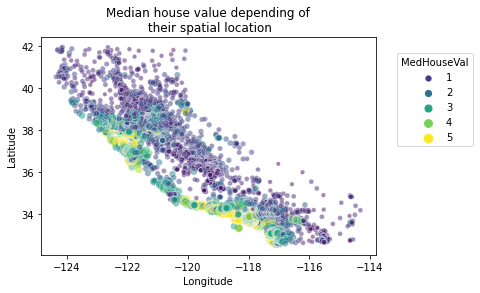

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
california_housing = fetch_california_housing(as_frame=True)
sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
plt.title("Median house value depending of\n their spatial location")

## III- Training/ Testing


### 1- Préparation des données 

Avec la fonction `train_test_split`, départager les données X et Y en données d'apprentissage (`X_train`, `Y_train`) et données test (`X_test` et `Y_test`) avec 40% pour le test.

In [7]:
from sklearn.model_selection import train_test_split

#target *= 100  # rescale the target in k$
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=0, test_size=0.4)

### 2- Régression linéaire avec la classe LinearRegression

- Importer le package  `linear_model` et on créer une instance de la classe **LinearRegression()**:

```
model_linReg = linear_model.LinearRegression()
```

- On entraine le modèle de régression sur les données d'apprentissage  à l’aide de la méthode `fit()`.

- Appliquer le modèle généré sur les données tests `x_test` à l'aide de la fonction `predict`.

- Calculer et afficher le ascore du modèle.

In [29]:
#importer la bibliothèque linear_model
from sklearn import linear_model
from sklearn.metrics import r2_score
#instancier le modèle
model_linReg = linear_model.LinearRegression()
#training
model_linReg.fit(X_train, Y_train)
#prédiction
Y_pred = model_linReg.predict(X_test)
#scoring
r2_score_linReg = r2_score(Y_test, Y_pred)
print("Le modèle de régression explique à ", round(r2_score_linReg*100,2), " % la variabilité des prix des logements.")

Le modèle de régression explique à  59.83  % la variabilité des prix des logements.


## VI- La validation croisée
On souhaite calculer la performance du modèle en utilisnt la validation croisée. Pour ce faire, importer la classe `cross_val_score` de la bibliothèque '`model_selection`'.

Appeler ensuite la fonction `cross_val_score` en lui passant le modèle linéaire créé ci-dessus (model_linReg) et les jeux de données x et y avec 5 ensuite 10 folds.  Le vecteur des scores est récupéré dans la variable `cv_results`. Afficher ce vecteur avec le score moyen et la déviation standard. Comparer les résultats obtenus avec 5 et 10 folds. Que constatez-vous?


In [30]:
from sklearn.model_selection import cross_val_score
import numpy as np
#lancement de la validation croisée avec 5 folds
cv_results = cross_val_score(model_linReg, X, Y, cv = 5)
#Affichage des résultats
print ("Le score obtenu pour chacun des 5 folds créés est : ",cv_results)
print ("Cela fait un score  moyen de : ", round(cv_results.mean()*100, 2), " %.")
print ("Et un écart-type de  : ", np.std(cv_results))
print ("---------------------------------------------")
#lancement de la validation croisée avec 10 folds
cv_results = cross_val_score(model_linReg, X, Y, cv = 10)
#Affichage des résultats
print ("Le score obtenu pour chacun des 10 folds créés est : ",cv_results)
print ("Cela fait un score moyen de : ",round(cv_results.mean()*100, 2), " %.")
print ("Et un écart-type de  : ", np.std(cv_results))

Le score obtenu pour chacun des 5 folds créés est :  [0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]
Cela fait un score  moyen de :  55.3  %.
Et un écart-type de  :  0.0616916014095326
---------------------------------------------
Le score obtenu pour chacun des 10 folds créés est :  [0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]
Cela fait un score moyen de :  51.1  %.
Et un écart-type de  :  0.059288613712729595


**Comparaison 5 folds vs 10 folds :**
Le score moyen est plus faible avec 10 folds qu'avec les 5. Mais l'écart type est plus faible avec les 10 folds. 

## V- Les ensembles d'apprentissage : Bagging

Scikit-learn implémente la procédure de bagging en tant que « méta-estimateur » (c’est-à-dire un estimateur qui enveloppe un autre estimateur) : il prend un modèle de base qui est
cloné plusieurs fois et formé indépendamment sur chaque échantillon d’apprentissage créé dans la phase d'échantillonnage.

L'objectif de cette question est de créer un ensemble de modèles de régression par le bagging. Nous définissons `n_estimators=100` au lieu d'1 dans notre implémentation 
ci-dessus pour obtenir un effet lissant plus fort.



*   Importer la bibliothèque `BaggingRegressor` (
`from sklearn.ensemble import BaggingRegressor`)

*   créer un ensemble de modèles de régression appelé `base_estimator` comme instance de la classe `BaggingRegressor` en utilisant  le modèle de régression linéaire créé ci-dessus et un nombre de modèles égale à 100

*   Lancer l'apprentissage avec `base_estimator` sur les données train 
*   Appliquer la prédiction avec `base_estimator` sur les données test 





In [50]:
#Importer la bibliothèque BaggingRegressor 
from sklearn.ensemble import BaggingRegressor
# Créer un ensemble de modèles de régression appelé base_estimator
base_estimator = BaggingRegressor(model_linReg, n_estimators=100, random_state=0)
#base_estimator = BaggingRegressor(model_linReg, n_estimators=500, random_state=0)

#Lancer l'apprentissage avec la fonction fit()
base_estimator.fit(X_train, Y_train)
#Lancer la prédiction avec la fonction predict()
Y_pred = base_estimator.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


### Scoring et validation de modèles

Calculer le scrore de l'ensemble `base_estimator`

Comparer le résultat avec le score du modèle linéaire avec un seul *estimator*. Que remarquez-vous? 

In [49]:
print(Y_test)
print(pd.DataFrame(Y_pred))
r2_bag_score = r2_score(Y_test, Y_pred)
print("Avec 1 estimateur, le modèle explique ", round(r2_score_linReg*100, 2), " % de la variabilité du prix des logements.")
print("Avec 100 estimateurs, le modèle explique ", round(r2_bag_score*100, 2), " % de la variabilité du prix des logements.")

           0
14740  1.369
10101  2.413
20566  2.007
2670   0.725
15709  4.600
...      ...
14805  1.875
1309   0.758
20500  2.270
19328  1.878
16443  1.135

[8256 rows x 1 columns]
             0
0     2.265976
1     2.789692
2     1.902932
3     1.042884
4     2.982878
...        ...
8251  4.121822
8252  1.094962
8253  3.027527
8254  2.117149
8255  1.173933

[8256 rows x 1 columns]
Avec 1 estimateur, le modèle explique  59.83  % de la variabilité du prix des logements.
Avec 100 estimateurs, le modèle explique  59.13  % de la variabilité du prix des logements.


On remarque que le modèle avec 100 estimateurs donne des résultats similaires à celui avec 1 estimateur.  
Constat : Avec la méthode du bagging, plus on a d'estimateurs (exemple 500 ou 1000), plus le score du modèle s'améliore mais le temps d'exécution aussi augmente.

# Exercice 2: Régression Non linéaire avec Scikit-learn

Dans cet exercice, il est demandé de reprendre toutes les étapes du premier exercice avec un modèle de régression de la classe `DecisionTreeRegressor` d'une profondeur maximale égale à 3:

```
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
```



In [59]:
line = "--------"*5
from sklearn.tree import DecisionTreeRegressor
# instanciation
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
# apprentissage
tree.fit(X_train, Y_train)
# prediction
Y_pred = tree.predict(X_test)
# scoring
r2_score_tree = r2_score(Y_test, Y_pred)
print("La régression non linéarire explique ", round(r2_score_tree*100,2), " % de la variablité du prix des logements. Tandis que le modèle linéaire expliquait ", round(r2_score_linReg*100,2) ," %.")

# validation croisée
#lancement de la validation croisée avec 5 folds
cv_results = cross_val_score(tree, X, Y, cv = 5)
#Affichage des résultats
print(line)
print("VALIDATION CROISEE")
print ("Le score obtenu pour chacun des 10 folds créés est : ",cv_results)
print ("Cela fait un score moyen de : ",round(cv_results.mean()*100, 2), " %.")
print ("Et un écart-type de  : ", np.std(cv_results))
print(line)

# bagging
# Créer un ensemble de modèles de régression appelé base_estimator
base_estimator_tree = BaggingRegressor(tree, n_estimators=100, random_state=0)
#base_estimator_tree = BaggingRegressor(tree, n_estimators=500, random_state=0)
#Lancer l'apprentissage avec la fonction fit()
base_estimator_tree.fit(X_train, Y_train)
#Lancer la prédiction avec la fonction predict()
Y_pred = base_estimator_tree.predict(X_test)
r2_bag_tree_score = r2_score(Y_test, Y_pred)

print(line)
print("BAGGING")
print("Avec 100 estimateurs, le modèle non linéaire explique ", round(r2_bag_tree_score*100, 2), " % de la variabilité du prix des logements.")


La régression non linéarire explique  50.24  % de la variablité du prix des logements. Tandis que le modèle linéaire expliquait  59.83  %.
----------------------------------------
VALIDATION CROISEE
Le score obtenu pour chacun des 10 folds créés est :  [0.4538519  0.43232135 0.51753817 0.30445633 0.53183194]
Cela fait un score moyen de :  44.8  %.
Et un écart-type de  :  0.08092984971381659
----------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


----------------------------------------
BAGGING
Avec 100 estimateurs, le modèle non linéaire explique  55.33  % de la variabilité du prix des logements.


On constate que le modèle avec 100 estimateurs (bagging) a un score meilleur que le modèle avec un seul estimateur.